44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100


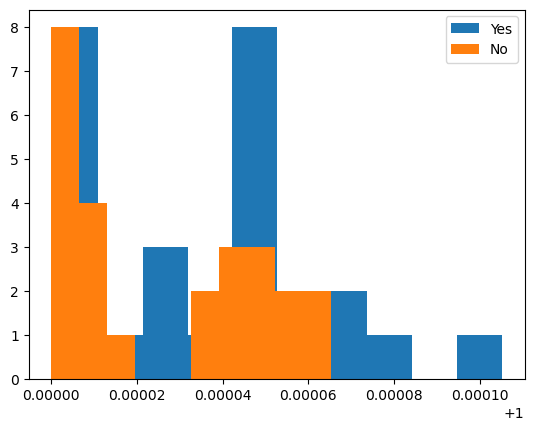

[1.000000374174489, 1.000072090272912, 1.0000445192882126, 1.0000062871353892, 1.000047701515453, 1.0000479811688805, 1.0000047686335733, 1.0001052232746404, 1.0000527581133265, 1.0000455238652106, 1.000075411296547, 1.000071278737119, 1.0000096946808683, 1.0000145560607738, 1.0000219497466445, 1.0000271314506175, 1.000006413567862, 1.0000475650343266, 1.0000372803627904, 1.0000515531136105, 1.0000085222959547, 1.000042617950795, 1.0000052118961538, 1.000007100081124, 1.0000274949973946]
1.0000273355466063
YES
YES
NO
YES
YES
NO
YES
YES
NO
NO
NO
YES
YES
NO
NO
YES
YES
NO
NO
YES
NO
YES
NO
NO


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
# from skimage.filters import threshold_adaptive
from skimage.filters import threshold_otsu
# Define a function to calculate the frequency power ratio
def calculate_frequency_power_ratio(audio_data):
    # Calculate the power spectral density (PSD)
    psd = np.abs(np.fft.fft(audio_data)) ** 2

    # Calculate the frequency power ratio
    frequency_power_ratio = np.mean(psd[:int(len(psd) / 2)]) / np.mean(psd[int(len(psd) / 2):])
    return frequency_power_ratio

# Load the training data
yes_data = []
no_data = []

for i in range(25):
    file_name = "train/yes" + str(i) + ".wav"
    audio_data, sample_rate = sf.read(file_name)
    print(sample_rate)
    yes_data.append(calculate_frequency_power_ratio(audio_data))

for i in range(25):
    file_name = "train/no" + str(i) + ".wav"
    audio_data, sample_rate = sf.read(file_name)
    no_data.append(calculate_frequency_power_ratio(audio_data))

# Draw the histograms of the training data
plt.hist(yes_data, label="Yes")
plt.hist(no_data, label="No")
plt.legend()
plt.show()
print(yes_data)
# Set the threshold
data = np.concatenate((yes_data, no_data))

# Calculate the optimal threshold using the Otsu's method
threshold = threshold_otsu(data)
print(threshold)

# threshold = 7

# Load the test data
test_data = []

for i in range(26,50):
    file_name = "test/no" + str(i) + ".wav"
    audio_data, sample_rate = sf.read(file_name)
    test_data.append(calculate_frequency_power_ratio(audio_data))

# Classify the test data
for frequency_power_ratio in test_data:
    if frequency_power_ratio > threshold:
        print("YES")
    else:
        print("NO")

# Detect silence
for frequency_power_ratio in test_data:
    if frequency_power_ratio == 0:
        print("No answer")

# Detect non-'yes' or 'no' words
for frequency_power_ratio in test_data:
    if frequency_power_ratio > threshold and frequency_power_ratio < 1:
        print("Incorrect answer")


In [3]:
scipy.__file__

NameError: name 'scipy' is not defined

In [ ]:
!pip uninstall scipy

In [6]:
!pip install --upgrade scipy

  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [ ]:
!pip install soundfile

inside read_wav f(x) no0
close success
inside read_wav f(x) no1
close success
inside read_wav f(x) no2
close success
inside read_wav f(x) no3
close success
inside read_wav f(x) no4
close success
inside read_wav f(x) no5
close success
inside read_wav f(x) no6
close success
inside read_wav f(x) no7
close success
inside read_wav f(x) no8
close success
inside read_wav f(x) no9
close success
inside read_wav f(x) no10
close success
inside read_wav f(x) no11
close success
inside read_wav f(x) no12
close success
inside read_wav f(x) no13
close success
inside read_wav f(x) no14
close success
inside read_wav f(x) no15
close success
inside read_wav f(x) no16
close success
inside read_wav f(x) no17
close success
inside read_wav f(x) no18
close success
inside read_wav f(x) no19
close success
inside read_wav f(x) no20
close success
inside read_wav f(x) no21
close success
inside read_wav f(x) no22
close success
inside read_wav f(x) no23
close success
inside read_wav f(x) no24
close success
inside rea

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


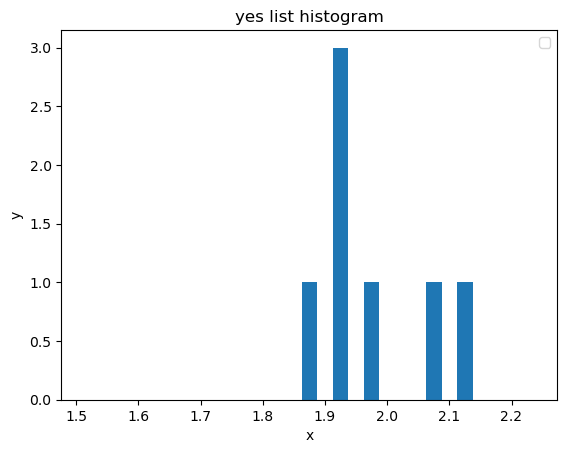

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


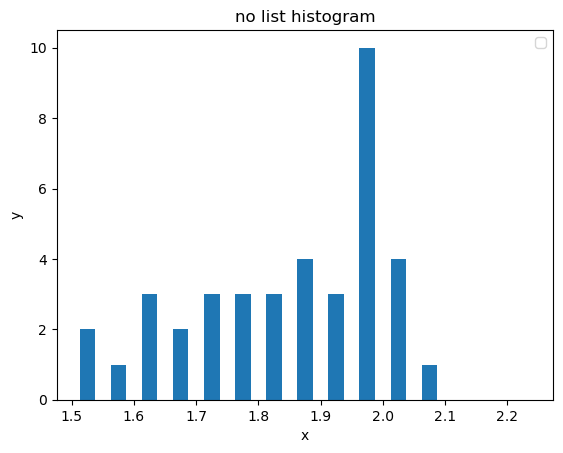

<Figure size 640x480 with 0 Axes>

In [5]:


import wave
import json
from scipy.fftpack import fft
import matplotlib.pyplot as plt


### method to compute absolute value of vector
def absolute_value_of_vector(vector):
    #print("inside absolute_value_of_vector f(x)")
    result=[]
    for i in vector:
        result.append(int(round(abs(i))))
    return result
    

def ff(x,N):

    result=[]
    
    i=0

    while i<=N:   
        #result.append(list(x.readframes(i)))
        temp = list(x.readframes(i))
        for i in temp:
            result.append(i)
        i+=100    
   
    return fft(result)


def recognize_yes_or_no(N,fs,wav):
   
    F=1.88
   
    k1=round(N*5100/fs)
    k2=round(N*11125/fs)

    
    X=absolute_value_of_vector(ff(wav,N))
 
    
    if k1<N and k2<N:
        a=X[0:k1]
        b=X[k1:k2]
    
        f=sum(a)/sum(b)
     
        
        f_list.append(f)
      
      
    if f<F:
      
        result.append("YES")
    else:
 
        result.append("NO")
    
    return 


    

def read_wav(inp):
    print("inside read_wav f(x)",inp)
    return "train/"+inp+".wav"

def test_fft(file_path):
        
    
    with wave.open(file_path, mode='rb') as wav:

        recognize_yes_or_no(wav.getnframes(),wav.getframerate(),wav)       
        wav.close()
        print("close success")
        











file_path=''
f_list=[]
fs_list=[]
N_list=[]
k1_list=[]
k2_list=[]
result=[]



for i in range(25):
    file_path=read_wav('no'+str(i))           
    test_fft(file_path)
for i in range(25):
    file_path=read_wav('yes'+str(i))            
    test_fft(file_path)



#print(N_list)


### separate f_list into yes and no lists

yes_f=[]
yes_f.append(f_list[0])
yes_f.extend(f_list[2:4])
yes_f.extend(f_list[7:11])

#
#
no_f=[]
no_f.append(f_list[1])
no_f.extend(f_list[4:7])
no_f.extend(f_list[11:])




s=1.5
bins=[]
bins.append(s)
for i in range(15):
    s=s+0.05
    bins.append(s)



#### histogram
#

plt.hist(yes_f, bins, histtype='bar', rwidth=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('yes list histogram')
plt.legend()
plt.show()



plt.hist(no_f, bins, histtype='bar', rwidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('no list histogram')
plt.legend()
plt.show()

fig = plt.figure()
fig.savefig('foo.png')


In [6]:
import wave
from scipy.fftpack import fft


def absolute_value_of_vector(vector):
    print("inside absolute_value_of_vector f(x)")
    result=[]
    for i in vector:
        result.append(int(round(abs(i))))
    return result
    
### method to compute FFT
def ff(x,N):
    print("inside ff f(x)")
    result=[]
    
    i=0

    while i<=N:   
      
        temp = list(x.readframes(i))
        for i in temp:
            result.append(i)
        i+=100      
    return fft(result)

### method to recognize a YES or a NO from wav sample
def recognize_yes_or_no(N,fs,wav):
    print("inside f(x)")
    print("N=",N," fs=",fs)

    F=1.8
  
    k1=round(N*5000/fs)
    k2=round(N*11025/fs)
    
    print("values of k1,k2 are:",k1,k2)
    
    X=absolute_value_of_vector(ff(wav,N))
    
    if k1<N and k2<N:
        a=X[0:k1]
        b=X[k1:k2]
        #print(a[k1-1])
        f=sum(a)/sum(b)
        print("f=",f)
        print(f)
  
    
    if f<F:
        print("IVR RESPONSE = YES")
    else:
        print("IVR RESPONSE = NO")
    return

### read a wav file



file_path="test/"
for i in range(26,50):
  
    file_address=file_path+'yes'+str(30)+'.wav'
    with wave.open(file_address, mode='rb') as wav:
        print("read success")
        recognize_yes_or_no(wav.getnframes(),wav.getframerate(),wav)    

        wav.close()
        print("close success")
# file_path="test/" 
# for i in range(26,50):
#     file_address=file_path+'no'+str(i)+'.wav'
#     with wave.open(file_path, mode='rb') as wav:
#         print("read success")
#         recognize_yes_or_no(wav.getnframes(),wav.getframerate(),wav)    

#         wav.close()
#         print("close success")

read success
inside f(x)
N= 48055  fs= 44100
values of k1,k2 are: 5448 12014
inside ff f(x)
inside absolute_value_of_vector f(x)
f= 1.3829426542592431
1.3829426542592431
IVR RESPONSE = YES
close success
read success
inside f(x)
N= 48055  fs= 44100
values of k1,k2 are: 5448 12014
inside ff f(x)
inside absolute_value_of_vector f(x)
f= 1.3829426542592431
1.3829426542592431
IVR RESPONSE = YES
close success
read success
inside f(x)
N= 48055  fs= 44100
values of k1,k2 are: 5448 12014
inside ff f(x)
inside absolute_value_of_vector f(x)
f= 1.3829426542592431
1.3829426542592431
IVR RESPONSE = YES
close success
read success
inside f(x)
N= 48055  fs= 44100
values of k1,k2 are: 5448 12014
inside ff f(x)
inside absolute_value_of_vector f(x)
f= 1.3829426542592431
1.3829426542592431
IVR RESPONSE = YES
close success
read success
inside f(x)
N= 48055  fs= 44100
values of k1,k2 are: 5448 12014
inside ff f(x)
inside absolute_value_of_vector f(x)
f= 1.3829426542592431
1.3829426542592431
IVR RESPONSE = YES